# Support Vector Machine

Цель данного ДЗ - "потрогать" алгоритм SVM на практике. 

### План действий
- Классификация
 - Предобработка, визуализации
 - SVM
 - Сравнение с KNN
 - Сравнение с логистической регрессиией
- Регрессия
 - Предобработка, визуализации
 - SVM
 - Сравнение с линейной регрессиией

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set()
plt.rcParams['figure.figsize'] = 12, 6

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Функции для работы

In [2]:
def get_classification_metrics(y_true, y_pred):
    metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    score = []
    for metric in metrics:
        score.append(metric(y_true, y_pred).round(3))
    return score


def mean_absolute_percentage_error(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    return np.mean(np.abs(y_true - y_predict) / y_true) * 100


def root_mean_squared_error(y_true, y_predict):
    return np.sqrt(mean_squared_error(y_true, y_predict))


def get_regression_metrics(y_true, y_pred):
    metrics = [mean_absolute_error,
               mean_squared_error,
               root_mean_squared_error,
               mean_absolute_percentage_error]
    score = []
    for metric in metrics:
        score.append(metric(y_true, y_pred).round(3))
    return score

# Классификация

Parkinson Dataset https://archive.ics.uci.edu/ml/datasets/parkinsons

In [3]:
df = pd.read_csv('parkinsons.data')

In [4]:
print(f'Размер выборки {df.shape}')
df.sample(7)

Размер выборки (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.000030,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
119,phon_R01_S27_5,217.116,233.481,93.978,0.00404,0.000020,0.00127,0.00128,0.00381,0.01299,...,0.02038,0.00681,24.581,1,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
27,phon_R01_S06_4,146.845,208.701,81.737,0.00496,0.000030,0.00250,0.00275,0.00749,0.01919,...,0.02650,0.01328,25.119,1,0.358773,0.726652,-6.271690,0.196102,2.314209,0.162999
177,phon_R01_S44_1,151.737,190.204,129.859,0.00314,0.000020,0.00135,0.00162,0.00406,0.01469,...,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
44,phon_R01_S10_3,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
143,phon_R01_S34_4,202.805,231.508,86.232,0.00370,0.000020,0.00189,0.00211,0.00568,0.01997,...,0.03350,0.02010,18.687,1,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
169,phon_R01_S42_5,240.301,245.135,219.783,0.00517,0.000020,0.00316,0.00283,0.00949,0.02018,...,0.03529,0.00965,21.020,0,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
columns_to_delete = ['name']

In [7]:
df = df.drop(columns=columns_to_delete, axis=1)

### Распределение целевой переменной

In [8]:
df['status'].value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

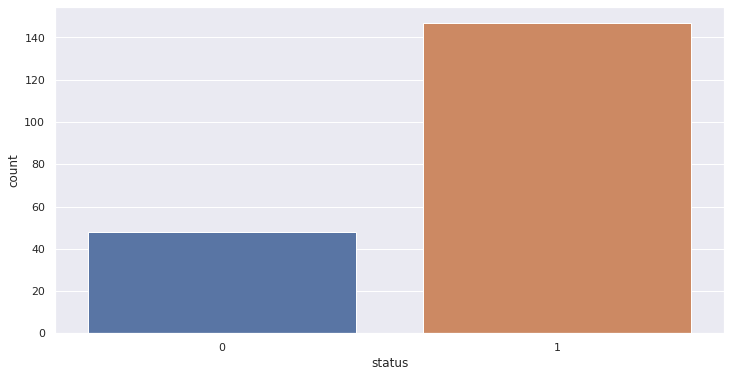

In [9]:
sns.countplot(df['status']);

### Распределения признаков

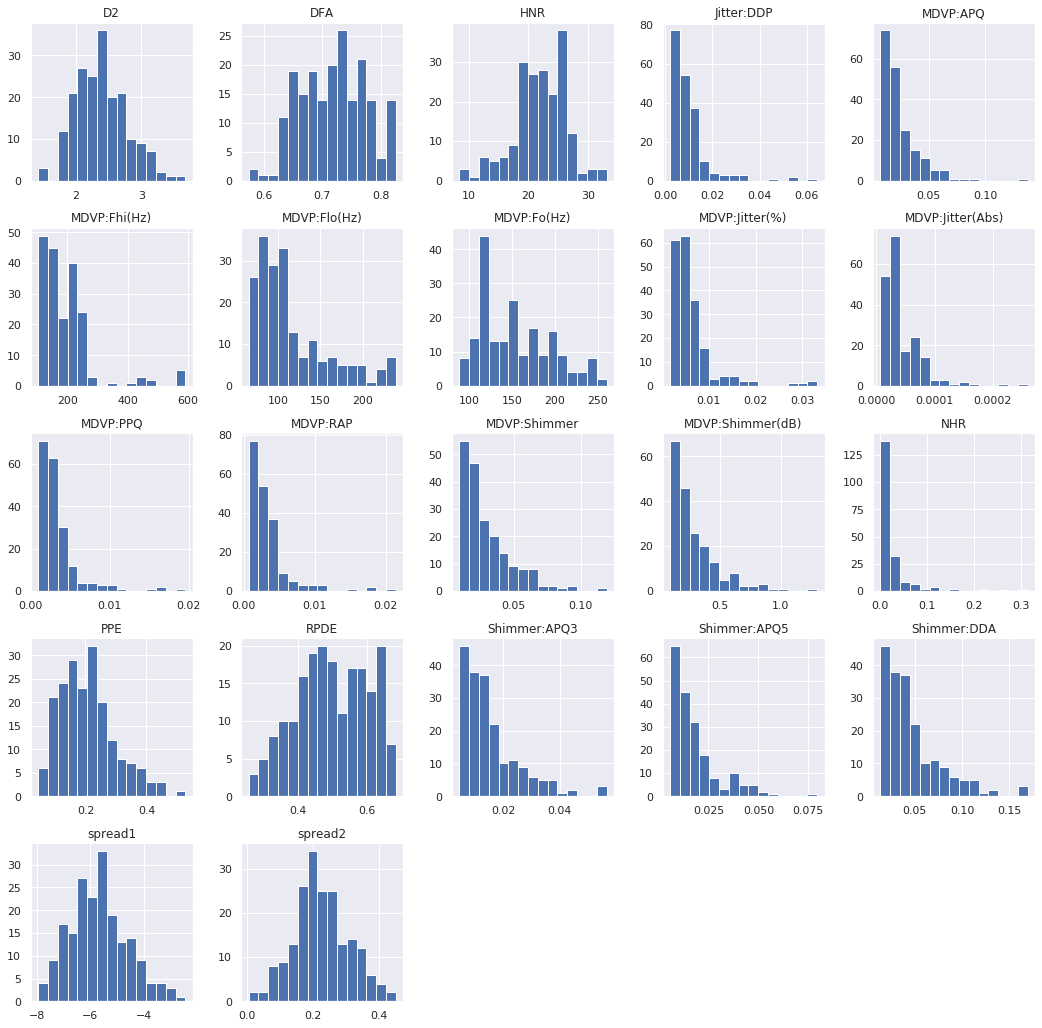

In [28]:
df.drop('status', axis=1).hist(figsize=[18, 18], bins=15);

In [10]:
X = df.drop('status', axis=1).values
y = df['status'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Нормализация

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SVM Grid Search

In [13]:
model = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
predict = grid_search.predict(X_test)

print('Best params:')
for key, value in grid_search.best_params_.items():
    print(f'{key}: {value}')

Best params:
C: 100
kernel: rbf


In [14]:
columns = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [15]:
quality = pd.DataFrame(
    [get_classification_metrics(y_test, predict)],
    index=[f'SVM {grid_search.best_params_["kernel"]}'],
    columns=columns
)
quality

,accuracy,precision,recall,f1,roc_auc
SVM rbf,0.898,0.921,0.946,0.933,0.848


### KNN Grid Search

In [16]:
model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 30), 'p': range(1, 5)}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
predict = grid_search.predict(X_test)

print('Best params:')
for key, value in grid_search.best_params_.items():
    print(f'{key}: {value}')

Best params:
n_neighbors: 1
p: 1


In [17]:
quality.loc['KNN', :] = get_classification_metrics(y_test, predict)
quality

,accuracy,precision,recall,f1,roc_auc
SVM rbf,0.898,0.921,0.946,0.933,0.848
KNN,0.878,0.919,0.919,0.919,0.834


### Logistic Regression  Grid Search

In [18]:
model = LogisticRegressionCV(Cs=100, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
predict = model.predict(X_test)
quality.loc['Log Regression', :] = get_classification_metrics(y_test, predict)

### Итоговые метрики

In [19]:
quality

,accuracy,precision,recall,f1,roc_auc
SVM rbf,0.898,0.921,0.946,0.933,0.848
KNN,0.878,0.919,0.919,0.919,0.834
Log Regression,0.857,0.857,0.973,0.911,0.736


# Регрессия
Возьмем датасет из `sklearn.datasets`

In [20]:
from sklearn.datasets import load_boston

In [21]:
boston = load_boston()

In [22]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [23]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

In [25]:
df = pd.DataFrame(data, columns=feature_names)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [28]:
df.sample(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97


### Распределения признаков

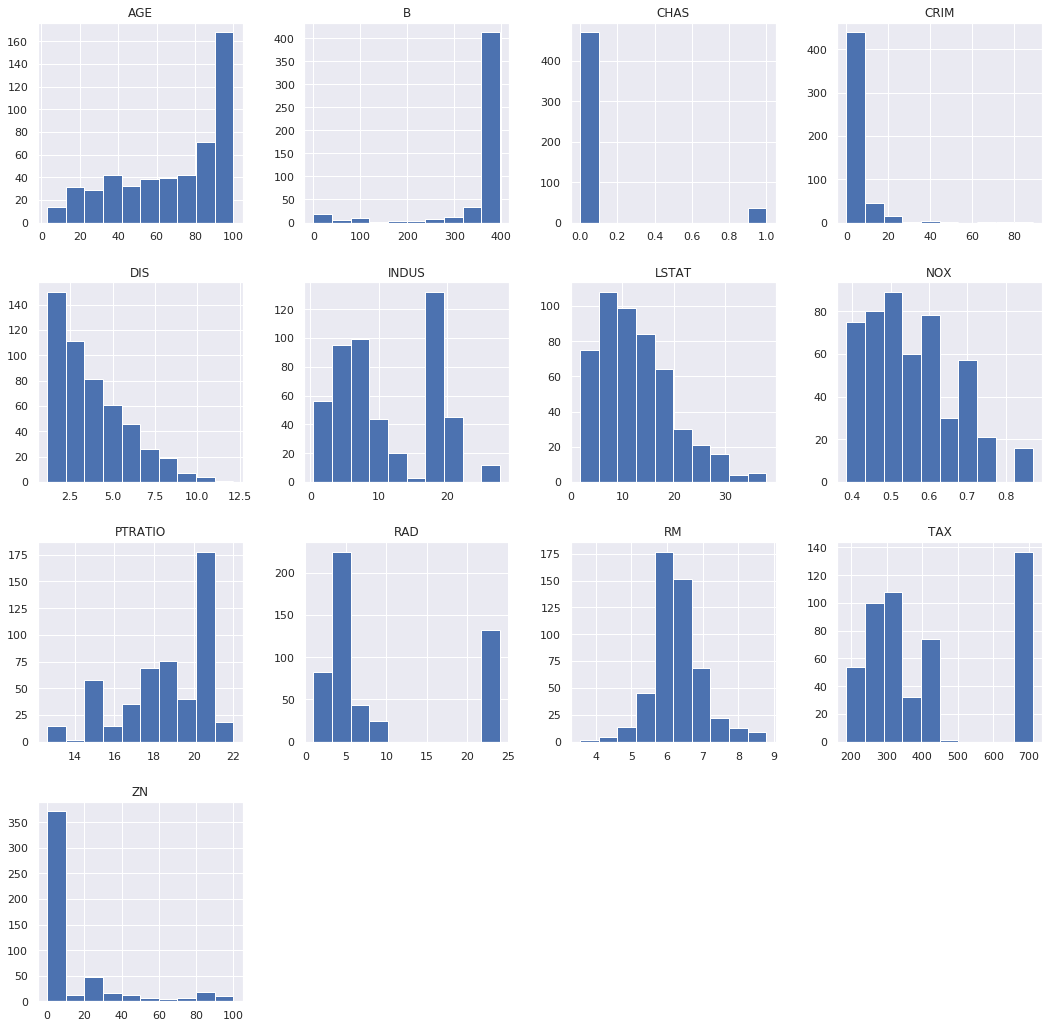

In [66]:
df.hist(figsize=[18, 18]);

### Целевая переменная

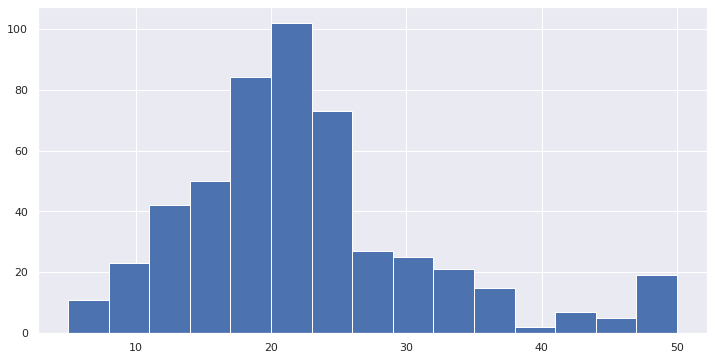

In [29]:
plt.hist(target, bins=15);

In [30]:
pd.Series(target).describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

### Нормализация признаков

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SVM

In [33]:
model = svm.SVR()
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
predict = grid_search.predict(X_test)

print('Best params:')
for key, value in grid_search.best_params_.items():
    print(f'{key}: {value}')

Best params:
C: 100
kernel: rbf


In [34]:
columns = ['MAE', 'MSE', 'RMSE', 'MAPE']
quality = pd.DataFrame(
    [get_regression_metrics(y_test, predict)],
    index=[f'SVM {grid_search.best_params_["kernel"]}'],
    columns=columns
)
quality

,MAE,MSE,RMSE,MAPE
SVM rbf,2.14,9.143,3.024,11.816


### Linear Regression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [36]:
quality.loc['Linear Regression', :] = get_regression_metrics(y_test, predict)
quality

,MAE,MSE,RMSE,MAPE
SVM rbf,2.14,9.143,3.024,11.816
Linear Regression,3.30,21.104,4.594,16.790


### LassoCV

In [38]:
model = LassoCV()
param_grid = {'eps': [0.0001, 0.001, 0.01, 0.1, 1, 10],}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
predict = grid_search.predict(X_test)

print('Best params:')
for key, value in grid_search.best_params_.items():
    print(f'{key}: {value}')
    
quality.loc['Lasso', :] = get_regression_metrics(y_test, predict)
quality

Best params:
eps: 0.01


,MAE,MSE,RMSE,MAPE
SVM rbf,2.140,9.143,3.024,11.816
Linear Regression,3.300,21.104,4.594,16.790
Lasso,3.252,21.069,4.590,16.439


In [39]:
model = RidgeCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)
    
quality.loc['Ridge', :] = get_regression_metrics(y_test, predict)

### Итоговые метрики

In [40]:
quality

,MAE,MSE,RMSE,MAPE
SVM rbf,2.140,9.143,3.024,11.816
Linear Regression,3.300,21.104,4.594,16.790
Lasso,3.252,21.069,4.590,16.439
Ridge,3.256,20.980,4.580,16.501
